### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis


### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df=pd.read_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 6\Exc 6.3\New folder\df_cleaned_geo_viz.pkl')

### 2. Data prep for regression analysis 

### Hypothesis
Cacao Percentage Impact on Rating

H0 (Null Hypothesis): The cacao percentage does not significantly affect the chocolate rating.

H1 (Alternative Hypothesis): The cacao percentage has a significant effect on the chocolate rating.

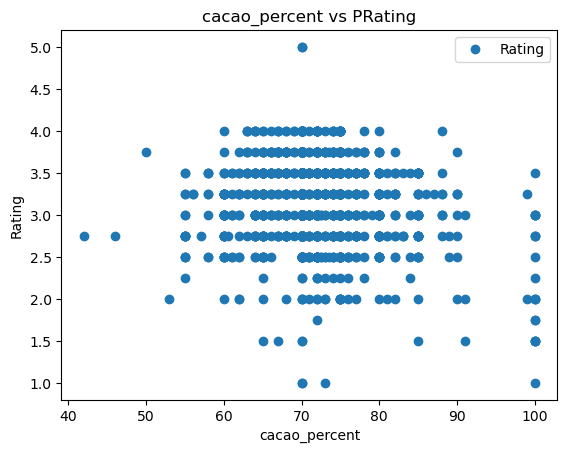

In [8]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'cacao_percent', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('cacao_percent vs PRating')  
plt.xlabel('cacao_percent')  
plt.ylabel('Rating')  
plt.show()

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['cacao_percent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [10]:
X

array([[63.],
       [70.],
       [70.],
       ...,
       [65.],
       [62.],
       [65.]])

In [11]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression analysis

In [24]:
# Create a regression object.
regression = LinearRegression()

In [26]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

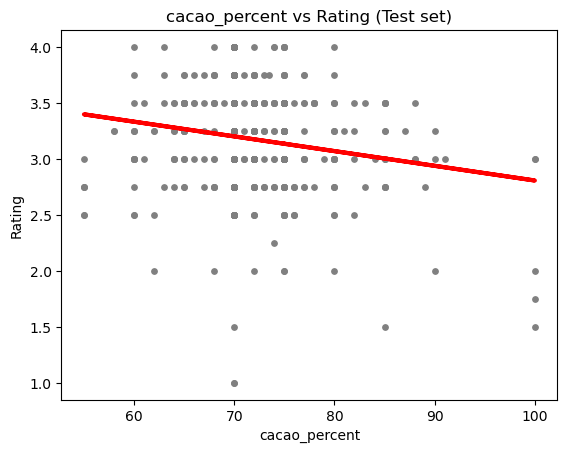

In [32]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('cacao_percent vs Rating (Test set)')
plot_test.xlabel('cacao_percent')
plot_test.ylabel('Rating')
plot_test.show()

The red regression line does not appear to fit the scatter plot very closely, as the data points are scattered widely around the line. This suggests that the relationship between cacao_percent and Rating is weak, and there may be other factors impacting the rating that the current model does not capture.

In [34]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [36]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01313255]]
Mean squared error:  0.2095351310152621
R2 score:  0.01811002046167509


### Model performance statistics
Mean Squared Error (MSE): 0.2095. This value suggests the average squared difference between actual and predicted ratings is relatively small but not insignificant.

R² Score: 0.0181. The model explains only 1.81% of the variance in the ratings, which is extremely low, indicating poor performance.

In [38]:
y_predicted

array([[3.13545711],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.06979435],
       [3.39810813],
       [3.20111986],
       [3.13545711],
       [3.25365007],
       [3.26678262],
       [3.27991517],
       [3.20111986],
       [3.26678262],
       [3.20111986],
       [3.13545711],
       [3.06979435],
       [3.0041316 ],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.16172221],
       [3.39810813],
       [2.80714333],
       [3.33244537],
       [3.13545711],
       [3.13545711],
       [3.22738497],
       [3.20111986],
       [3.22738497],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.13545711],
       [3.20111986],
       [3.17485476],
       [3.27991517],
       [3.17485476],
       [3.20111986],
       [3.13545711],
       [3.26678262],
       [3.20111986],
       [3.39810813],
       [3.20111986],
       [3.33244537],
       [3.10919201],
       [3.135

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


The predicted values are quite close to 3 for most observations, showing little variation despite actual ratings ranging from 1.50 to 3.75.

The model does not capture the variability well.

# Thoughts on Model Performance
 The model's low R² score and tendency to predict ratings close to 3 suggest it doesn't capture the underlying patterns of the data. 
 
 The cacao percentage alone does not seem to be a strong predictor of chocolate ratings, implying that other features (such as origin, reviews, or subjective preferences) are likely more important.

# Reflections on Data Bias

Reviewer Bias: Different reviewers might have subjective preferences, which could skew the ratings and introduce bias into the model.

Missing Data: Certain features like chocolate variety or origin could impact ratings but may be missing from the dataset.

Geographical Bias: If the dataset over-represents certain regions, the model may not generalize well to chocolates from other regions.

# Export data

In [54]:
df.to_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 6\Exc 6.4\New folder\df_supervised_ML.pkl')